# Problem Statement
Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’ You are the business owner of the retail firm and want to see how your company is performing. You are interested in finding out the weak areas where you can work to make more profit. What all business problems you can derive by looking into the data? 

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as grd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data

In [93]:
# reading data
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data statistics

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Total number of features available are thirteen where five features are continuous in nature and eight features are in categorical features.

### checking for missing values

In [8]:
# count number of null entries in each row
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

From the above result we can see there is no null entry in the dataset

In [10]:
data_Categorical = data.drop(['Postal Code','Sales','Quantity','Discount','Profit'], axis=1)
data_Categorical.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [13]:
data_continuous = data.drop(['Ship Mode','Segment','Country','City','State','Region','Category','Sub-Category'], axis=1)
data_continuous.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


# Data Visualization- univariate Analysis

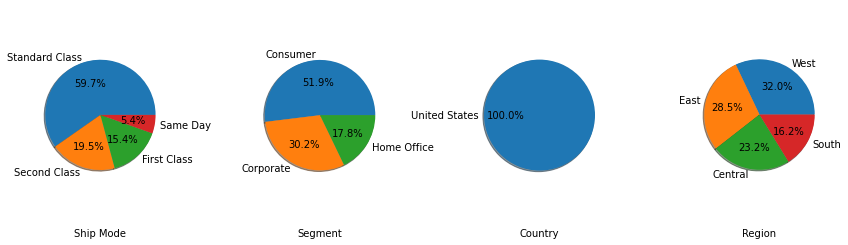

In [28]:
gs = grd.GridSpec(1, 4, wspace=0.8)
fig = plt.figure(figsize = (14,4))
a1 = plt.subplot(gs[0]) 
a= data['Ship Mode'].value_counts()
Segment= a.index
count = a.values
#explode = (0,0.2,0)
a1.pie(count, labels=Segment,shadow=True, autopct='%1.1f%%')
plt.xlabel('Ship Mode')
plt.axis('equal')

a2 = plt.subplot(gs[1])
a= data['Segment'].value_counts()
Segment= a.index
count = a.values
a2.pie(count, labels=Segment,shadow=True, autopct='%1.1f%%')
plt.xlabel('Segment')
plt.axis('equal')

a2 = plt.subplot(gs[2])
a= data['Country'].value_counts()
Segment= a.index
count = a.values
a2.pie(count, labels=Segment,shadow=True, autopct='%1.1f%%')
plt.xlabel('Country')
plt.axis('equal')

a2 = plt.subplot(gs[3])
a= data['Region'].value_counts()
Segment= a.index
count = a.values
a2.pie(count, labels=Segment,shadow=True, autopct='%1.1f%%')
plt.xlabel('Region')
plt.axis('equal')

plt.show()

Seeing the above pie charts, we get to know that we are dealing with the dataset of only one country that is United State. So we can exclude this feature from the dataset.  

In [30]:
data = data.drop(['Country'], axis=1)
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


(-1.1129844683421999,
 1.1006183080162952,
 -1.1259910966341624,
 1.1143025661925086)

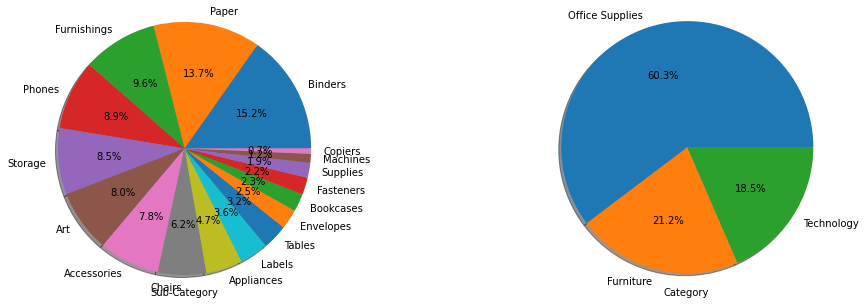

In [71]:
gs = grd.GridSpec(1, 2, wspace=0.8)
fig = plt.figure(figsize = (14,5))
a1 = plt.subplot(gs[0]) 
a= data['Sub-Category'].value_counts()
Segment= a.index
count = a.values
#explode = (0,0.2,0)
a1.pie(count, labels=Segment,shadow=True, autopct='%1.1f%%')
plt.xlabel('Sub-Category')
plt.axis('equal')

a2 = plt.subplot(gs[1])
a= data['Category'].value_counts()
Segment= a.index
count = a.values
a2.pie(count, labels=Segment,shadow=True, autopct='%1.1f%%')
plt.xlabel('Category')
plt.axis('equal')

/home/amrita/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amrita/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amrita/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<AxesSubplot:xlabel='Discount', ylabel='Density'>

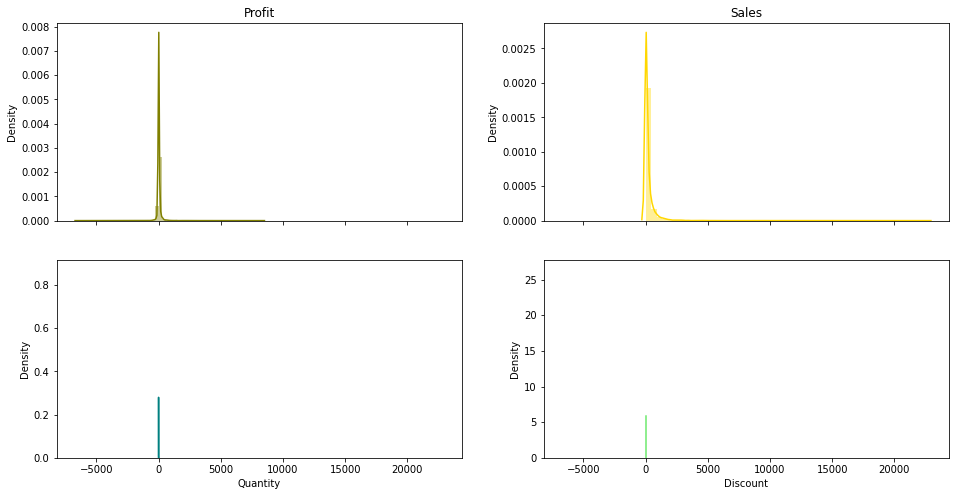

In [63]:
import seaborn as sns
# plot
f, axes = plt.subplots(2,2, figsize=(16, 8), sharex=True)
#sns.distplot( data["Postal Code"] , color="skyblue", ax=axes[0])
ax = sns.distplot( data["Profit"] , color="olive", ax=axes[0,0])
ax.set(title="Profit")
bx = sns.distplot( data["Sales"] , color="gold", ax=axes[0,1])
bx.set(title="Sales")
sns.distplot( data["Quantity"] , color="teal", ax=axes[1,0])
sns.distplot( data["Discount"] , color="lightgreen", ax=axes[1,1])

Discounts on items attract consumers. More discount on items large number of consumers get attracted which decreses advertisments cost and increases profit.
But in this case there is almost zero discounts on all items which leads to zero Sales then zero quantity then almost zero Profit. 

# Data Visualization- Bivariate Analysis

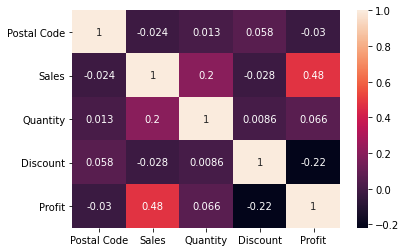

In [64]:
sns.heatmap(data.corr(), annot=True)
plt.show()

Correlation between Profit and Discount is small and negative, which indicates on increase of discount on items, profit will decrease which is quite obvious. That's why what producers do is first they increase the price of item from the original one and then they give discount.

Correlation between Sales and Profit is strong positive which indicates with increase in Sales, Profit will increase, which is quite obvious. And Sales will increase when consumers will see discount on items.

#####  Cheking the contribution of categorical variables values in profit making

(-1.1118130238148467,
 1.100562575516656,
 -1.1114210146967969,
 1.1210837125139754)

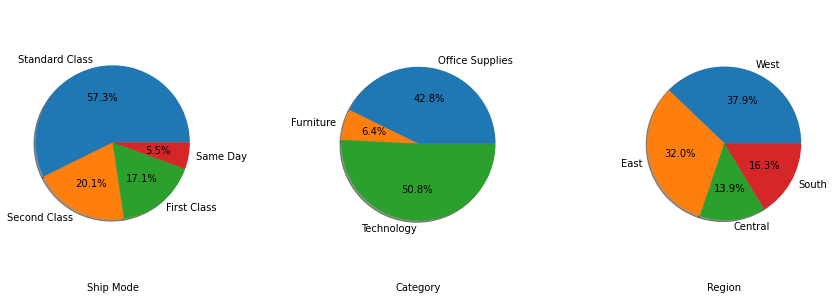

In [128]:
gs = grd.GridSpec(1, 3, wspace=0.8)
fig = plt.figure(figsize = (14,5))

a1 = plt.subplot(gs[0]) 
a= data['Ship Mode'].value_counts()
Segment= a.index
count = [164088.7875,57446.6354,48969.8399,15891.7589]
a1.pie(count, labels=Segment,shadow=True, autopct='%1.1f%%')
plt.xlabel('Ship Mode')
plt.axis('equal')

a2 = plt.subplot(gs[1])
a= data['Category'].value_counts()
indices = a.index
count = [122490.8008,18451.2728,145454.9481]
a2.pie(count, labels=indices,shadow=True, autopct='%1.1f%%')
plt.xlabel('Category')
plt.axis('equal')

a3 = plt.subplot(gs[2])
a= data['Region'].value_counts()
indices = a.index
count = [108418.4489,91522.7800,39706.3625,46749.4303]
a3.pie(count, labels=indices,shadow=True, autopct='%1.1f%%')
plt.xlabel('Region')
plt.axis('equal')

If we consider total profit as 100 % then from the region chart we can see West and East region of country contributed 70% of the total profit. So expanding bussiness in these regions will help increase in profit.

From category chart we can see among Furniture, Technology and Office Supplies demand of Technology and Office Supplies is very high compared to Furniture, then investing large amount of money in Technology and Office Supplies will help boosting the company.